# 1. How To Plot Data in Python 3 Using matplotlib
#### Published on November 7, 2016

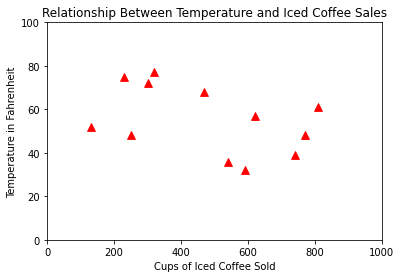

In [1]:
import matplotlib.pyplot as plt


X = [590,540,740,130,810,300,320,230,470,620,770,250]
Y = [32,36,39,52,61,72,77,75,68,57,48,48]

#scatter plot
plt.scatter(X, Y, s=60, c='red', marker='^')

#change axes ranges
plt.xlim(0,1000)
plt.ylim(0,100)

#add title
plt.title('Relationship Between Temperature and Iced Coffee Sales')

#add x and y labels
plt.xlabel('Cups of Iced Coffee Sold')
plt.ylabel('Temperature in Fahrenheit')

#show plot
plt.show()

# 2. How To Install the pandas Package and Work with Data Structures in Python 3
 ### Published on February 10, 2017

In [2]:
import numpy as np
import pandas as pd

s  = pd.Series([0, 1, 4, 9, 16, 25], name = "Squares")
s

0     0
1     1
2     4
3     9
4    16
5    25
Name: Squares, dtype: int64

In [3]:
avg_ocean_depth = pd.Series([1205, 3646, 3741, 4080, 3270], index=['Arctic',  'Atlantic', 'Indian', 'Pacific', 'Southern'])
avg_ocean_depth

Arctic      1205
Atlantic    3646
Indian      3741
Pacific     4080
Southern    3270
dtype: int64

In [4]:
# Indexing and Slicing Series
avg_ocean_depth[2]

3741

In [5]:
avg_ocean_depth[2:4]

Indian     3741
Pacific    4080
dtype: int64

In [6]:
avg_ocean_depth["Indian"]

3741

In [7]:
avg_ocean_depth["Indian": "Southern"]

Indian      3741
Pacific     4080
Southern    3270
dtype: int64

#### **Series Initialized with Dictionaries**

In [8]:
import numpy as np
import pandas as pd

avg_ocean_depth = pd.Series({"Arctic":1205,
                             "Atlantic": 3646,
                             "Indian": 3741,
                             "Pacific": 4080,
                             "Southern": 3270
})

print(avg_ocean_depth)

Arctic      1205
Atlantic    3646
Indian      3741
Pacific     4080
Southern    3270
dtype: int64


In [9]:
print(avg_ocean_depth['Indian'])
print(avg_ocean_depth['Atlantic':'Indian'])

3741
Atlantic    3646
Indian      3741
dtype: int64


### **DataFrames**

In [10]:
import numpy as np
import pandas as pd


avg_ocean_depth = pd.Series({
                    'Arctic': 1205,
                    'Atlantic': 3646,
                    'Indian': 3741,
                    'Pacific': 4080,
                    'Southern': 3270
})

max_ocean_depth = pd.Series({
                    'Arctic': 5567,
                    'Atlantic': 8486,
                    'Indian': 7906,
                    'Pacific': 10803,
                    'Southern': 7075
})

In [11]:
ocean_depths = pd.DataFrame({
    "Avg. Depth (m)": avg_ocean_depth,
    "Max. Depth (m)": max_ocean_depth
})
print(ocean_depths)

          Avg. Depth (m)  Max. Depth (m)
Arctic              1205            5567
Atlantic            3646            8486
Indian              3741            7906
Pacific             4080           10803
Southern            3270            7075


In [13]:
# Sorting a Data in DataFrames
print(ocean_depths.sort_values("Avg. Depth (m)", ascending=True))

          Avg. Depth (m)  Max. Depth (m)
Arctic              1205            5567
Southern            3270            7075
Atlantic            3646            8486
Indian              3741            7906
Pacific             4080           10803


In [14]:
# Statistical Analysis with DataFrames
ocean_depths.describe()

,Avg. Depth (m),Max. Depth (m)
count,5.000000,5.000000
mean,3188.400000,7967.400000
std,1145.671113,1928.188347
min,1205.000000,5567.000000
25%,3270.000000,7075.000000
50%,3646.000000,7906.000000
75%,3741.000000,8486.000000
max,4080.000000,10803.000000


In [15]:
# Handling Missing Values
import numpy as np
import pandas as pd


user_data = {'first_name': ['Sammy', 'Jesse', np.nan, 'Jamie'],
        'last_name': ['Shark', 'Octopus', np.nan, 'Mantis shrimp'],
        'online': [True, np.nan, False, True],
        'followers': [987, 432, 321, np.nan]}

df = pd.DataFrame(user_data, columns = ['first_name', 'last_name', 'online', 'followers'])

print(df)

  first_name      last_name online  followers
0      Sammy          Shark   True      987.0
1      Jesse        Octopus    NaN      432.0
2        NaN            NaN  False      321.0
3      Jamie  Mantis shrimp   True        NaN


In [17]:
df_drop_missing = df.dropna()
df_drop_missing

,first_name,last_name,online,followers
0,Sammy,Shark,True,987.0


In [19]:
df_fill = df.fillna(0)
df_fill

,first_name,last_name,online,followers
0,Sammy,Shark,True,987.0
1,Jesse,Octopus,0,432.0
2,0,0,False,321.0
3,Jamie,Mantis shrimp,True,0.0


In [20]:
df_fill.describe()

,followers
count,4.000000
mean,435.000000
std,411.069337
min,0.000000
25%,240.750000
50%,376.500000
75%,570.750000
max,987.000000


# 3. How To Graph Word Frequency Using matplotlib with Python 3
### Published on February 17, 2017

In [ ]:
# Step 1 — Setting Up the Program File
import matplotlib.pyplot as plt
import sys
import operator
import argparse

# Step 2 – Setting Up the Argument Parser
def main():
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "word",
        help="the word to be searched for in the text file."
    )
    parser.add_argument(
        "filename",
        help="the path to the text file to be searched through"
    )
    args = parser.parse_args()
    try:
        open(args.filename)
    except FileNotFoundError:
        sys.stderr.write("Error: " + args.filename + " does not exist!")
        sys.exit(1)
    word_freq(args.word, args.filename)

# Step 3 — Parsing the File
def word_freq(word, filename):
    doc = {}
    for line in open(filename):
        split = line.split(" ")
        for entry in split:
            if (doc.__contains__(entry)):
                doc[entry] = int(doc.get(entry)) + 1
            else:
                doc[entry] = 1
                if (not word in doc):
                    sys.stderr.write("Error: " + word + " does not appear in " + filename)
                    sys.exit(1)

                sorted_doc = (sorted(doc.items(), key = operator.itemgetter(1)))[::-1]
                just_the_occur = []
                just_the_rank = []
                word_rank = 0
                word_frequency = 0
                
if __name__ == "__main__":
    main()

In [21]:
import matplotlib.pyplot as plt
import sys
import operator
import argparse


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "word",
        help="the word to be searched for in the text file."
    )
    parser.add_argument(
        "filename",
        help="the path to the text file to be searched through"
    )

    args = parser.parse_args()

    try:
        open(args.filename)
    except FileNotFoundError:

        # Custom error print
        sys.stderr.write("Error: " + args.filename + " does not exist!")
        sys.exit(1)

    word_freq(args.word, args.filename)


def word_freq(word, filename):
    doc = {}

    for line in open(filename):

        # Assume each word is separated by a space
        split = line.split(' ')
        for entry in split:
            if (doc.__contains__(entry)):
                doc[entry] = int(doc.get(entry)) + 1
            else:
                doc[entry] = 1

    if (word not in doc):
        sys.stderr.write("Error: " + word + " does not appear in " + filename)
        sys.exit(1)

    sorted_doc = (sorted(doc.items(), key=operator.itemgetter(1)))[::-1]
    just_the_occur = []
    just_the_rank = []
    word_rank = 0
    word_frequency = 0

    entry_num = 1
    for entry in sorted_doc:

        if (entry[0] == word):
            word_rank = entry_num
            word_frequency = entry[1]

        just_the_rank.append(entry_num)
        entry_num += 1
        just_the_occur.append(entry[1])

    plt.title("Word Frequencies in " + filename)
    plt.ylabel("Total Number of Occurrences")
    plt.xlabel("Rank of word(\"" + word + "\" is rank " + str(word_rank) + ")")
    plt.loglog(just_the_rank, just_the_occur, basex=10)
    plt.scatter(
        [word_rank],
        [word_frequency],
        color="orange",
        marker="*",
        s=100,
        label=word
    )
    plt.show()

if __name__ == "__main__":
    main()

usage: ipykernel_launcher.py [-h] word filename
ipykernel_launcher.py: error: the following arguments are required: word, filename


SystemExit: 2

/Users/kassayebelay/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
import matplotlib.pyplot as plt
import numpy as np

eqs = []
eqs.append(
r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}
{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\
delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \
sigma_2}}\right]$"
)
eqs.append(
r"$\frac{d\rho}{d t} + \rho \vec{v} \cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \
˓→vec{v} + \rho \vec{g} $"
)
eqs.append(r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$")
eqs.append(r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$")
eqs.append(r"$F_G = G\frac{m_1m_2} {r^2}$")
plt.axes([0.025, 0.025, 0.95, 0.95])

SyntaxError: EOL while scanning string literal (3971590634.py, line 6)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng()
for i in range(24):
    index = rng.integers(0, len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12, 32)
    x, y = np.random.uniform(0, 1, 2)
    alpha = np.random.uniform(0.25, 0.75)
    plt.text(
    x,
    y,
    eq,
    ha="center",
    va="center",
    color="#11557c",
    alpha=alpha,
    transform=plt.gca().transAxes,
    fontsize=size,
    clip_on=True,
    )
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'eqs' is not defined